<a href="https://colab.research.google.com/github/dartwinshu/rakamin-digital-festival-data-science/blob/main/Python%20Understanding%20Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Mengubah parameter default matplotlib
Parameter default matplotlib dapat diubah dengan rcParams sebagai berikut (optional: estetika plot)


In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

## Load dataset

Untuk hands-on kita akan melihat dataset sintetik prediksi kebotakan. Agar running time-nya tidak terlalu lama, kali ini kita ambil sampel 1000 baris data saja.

In [4]:
# change file path if necessary
df = pd.read_csv('botak.csv').sample(1000, random_state=42)

## Descriptive Statistics
### Memeriksa kolom-kolom dan nilai hilang dengan `df.info()`

Hal pertama yang biasanya dilakukan dalam EDA adalah mengecek tipe data setiap kolom dan jumlah nilai yang hilang. Hal ini bisa kita lakukan dengan menggunakan `df.info()`.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 6255 to 6621
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           1000 non-null   float64
 1   jenis_kelamin  999 non-null    object 
 2   pekerjaan      987 non-null    object 
 3   provinsi       1000 non-null   object 
 4   gaji           1000 non-null   float64
 5   is_menikah     1000 non-null   int64  
 6   is_keturunan   1000 non-null   float64
 7   berat          1000 non-null   float64
 8   tinggi         1000 non-null   float64
 9   sampo          1000 non-null   object 
 10  is_merokok     1000 non-null   int64  
 11  pendidikan     1000 non-null   object 
 12  botak_prob     1000 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 109.4+ KB


Kita dapat melihat bahwa:
* Dataframe memiliki total 1000 baris dan 13 kolom
* Dataframe masih memiliki *null* values di kolom `pekerjaan` dan `jenis_kelamin`
* Target klasifikasi adalah kolom `botak_prob` dengan tipe data `float64`
* Berarti sisanya adalah *feature* (predictor)

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [6]:
# best practice
cats = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan', 'provinsi']
nums = ['umur', 'gaji', 'is_menikah', 'is_keturunan', 'berat', 'tinggi', 'is_merokok', 'botak_prob']

Tentu saja menyimpan nama kolom berdasarkan tipe *numeric* dan *categorical* seperti di atas tidak wajib, tapi ini lumayan akan memudahkan beberapa proses ke depannya.

### Sampling untuk memahami data dengan `df.sample()`

Setelah mengetahui kolom apa saja yang ada di dalam dataset, kita lakukan sampling untuk memastikan apakah isi kolomnya sesuai ekspektasi. Biasakan lakukan ini beberapa kali karena seringkali apabila ada keanehan tidak akan keluar pada sampling pertama.

Sampling dapat dilakukan dengan menggunakan `df.sample()`

In [14]:
df.sample(5)

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,botak_prob
982,37.0,Perempuan,PNS,Serang,1.255546e+07,0,0.0,56.806408,158.727226,Merpati,0,S1,0.267744
4478,41.0,Laki-laki,PNS,Palembang,1.276825e+07,0,1.0,50.045133,156.674450,Deadbuoy,0,S1,0.695412
3317,47.0,Perempuan,PNS,Ambon,7.878717e+06,0,0.0,59.755579,159.074581,Deadbuoy,0,S1,0.279869
4322,42.0,Perempuan,Pegawai swasta,Serang,1.042874e+07,0,0.0,53.516554,159.321199,Deadbuoy,0,S1,0.272655
7648,49.0,Laki-laki,Pegawai swasta,Padang,3.077706e+06,0,0.0,68.888055,166.111800,Merpati,1,S2,0.446233


Beberapa pengamatan:
* Target kita, `botak_prob` benar bertipe float dengan *range* 0-1, dimana 1 melambangkan kemungkinan 100%
* Sepertinya tidak ada yang aneh dengan input setiap kolom (sudah sesuai)

### Statistical summary dengan `df.describe()`
Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk `feature` numeric.

In [15]:
df[nums].describe()

,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,botak_prob
count,1000.000000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.008000,9.223088e+06,0.033000,0.18000,56.162619,157.486031,0.492000,0.390735
std,9.886642,4.739127e+06,0.178726,0.38438,9.258898,6.548078,0.500186,0.192807
min,8.000000,1.500000e+06,0.000000,0.00000,40.921334,142.554038,0.000000,-0.068044
25%,33.000000,5.849544e+06,0.000000,0.00000,50.099311,152.899106,0.000000,0.260230
50%,40.000000,8.107307e+06,0.000000,0.00000,54.102392,157.293445,0.000000,0.368024
75%,47.000000,1.132830e+07,0.000000,0.00000,60.485423,161.493659,1.000000,0.508568
max,72.000000,4.179443e+07,1.000000,1.00000,128.643924,193.484937,1.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `umur` terlihat normal/simetrik (*mean* dan *median* cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
* Sedangkan kolom `gaji` tampaknya tidak simetrik, karena mean > median
* Ada baris yang memiliki probability `botak_prob` minus. Baris ini harus dihilangkan di tahap pre-processing nanti

In [16]:
# jumlah baris dengan botak_prob negative
df[df['botak_prob']<0].shape[0]

11

In [17]:
df[cats].describe()

,jenis_kelamin,pekerjaan,sampo,pendidikan,provinsi
count,999,987,1000,1000,1000
unique,2,4,5,6,34
top,Laki-laki,Pegawai swasta,Merpati,S1,Denpasar
freq,684,409,228,562,41


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Mayoritas data adalah Laki-laki (Top kolom `jenis_kelamin` adalah `Laki-laki` dengan frekuensi 684)
* Kolom `provinsi` memiliki jumlah nilai unik yang banyak;ada kemungkinan tidak terlalu berguna untuk menjadi predictor

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

### Box plots

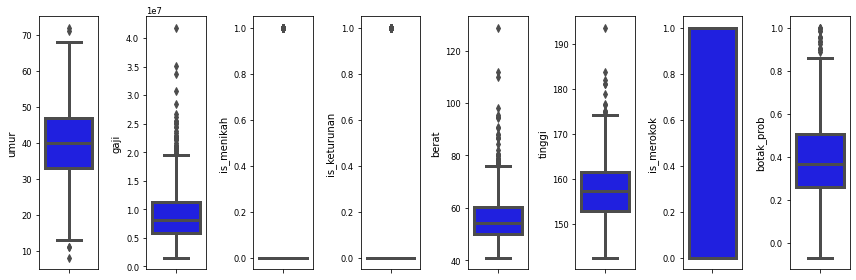

In [18]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='blue', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `gaji`, `berat`, dan `tinggi`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed* (tidak simetrik) yang ditandai dengan lokasi box yang jauh dari daterah tengah sumbu Y: `gaji`, `berat`, `tinggi`

### Dist plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

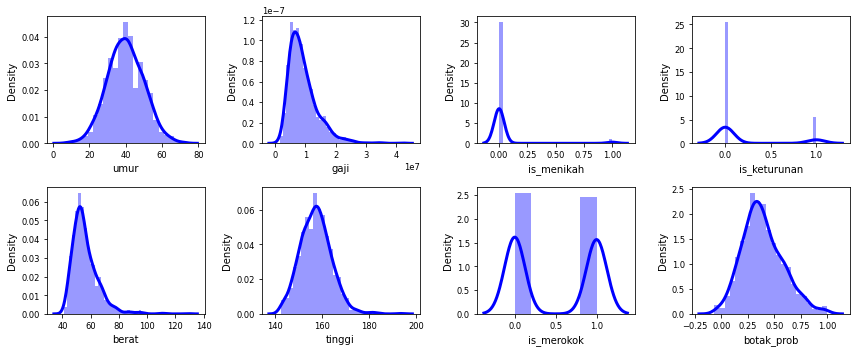

In [19]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='blue')
    plt.tight_layout()

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot di atas, kolom `gaji`, `berat`, dan `tinggi` sedikit *skewed*
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kolom2 tersebut nantinya
* Selain kolom2 itu distribusinya terlihat cukup simetrik

### Count plot (categorical)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

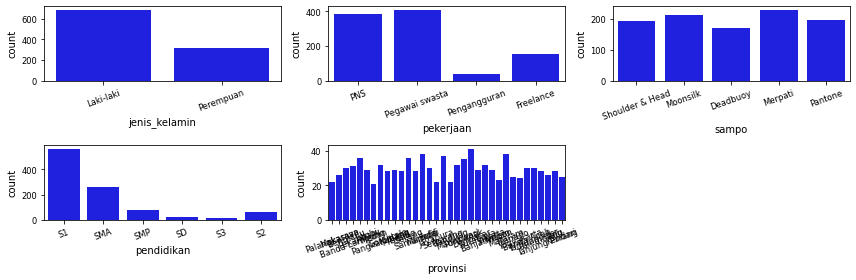

In [20]:
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='blue', orient='v')
    plt.xticks(rotation=20)
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. Seperti pengamatan kita sebelumnya, distribusi `pendidikan` dan `pekerjaan` didominasi 1-2 value.


## Multivariate Analysis

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

### Correlation heatmap

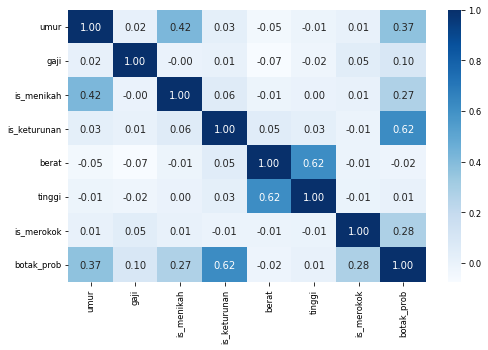

In [21]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target kita `botak_prob` memiliki korelasi positif kuat dengan `is_keturunan`
* Ia juga memiliki korelasi positif lemah dengan `umur`, `is_menikah`, dan `is_merokok`
* `tinggi` juga memiliki korelasi positif kuat dengan `berat`. Ada kemungkinan kedua *feature* ini redundan

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan yang major
* Namun masih ada baris dengan target variabel bernilai negatif, yang mana tidak mungkin, jadi perlu didrop nantinya. 
* Juga masih ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Beberapa *feature* memiliki korelasi yang jelas dengan *target*, mereka akan dipakai
* Beberapa *feature* terlihat sama sekali tidak berkorelasi, mereka sebaiknya diabaikan
* Dari Heatmap: ada feature yang korelasinya tinggi satu sama lain (berat/tinggi) mungkin cuma akan dipakai satu